In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense


from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, explained_variance_score

plt.style.use('dark_background')

%matplotlib inline

In [3]:
df = pd.read_csv('./data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<Axes: xlabel='price', ylabel='Count'>

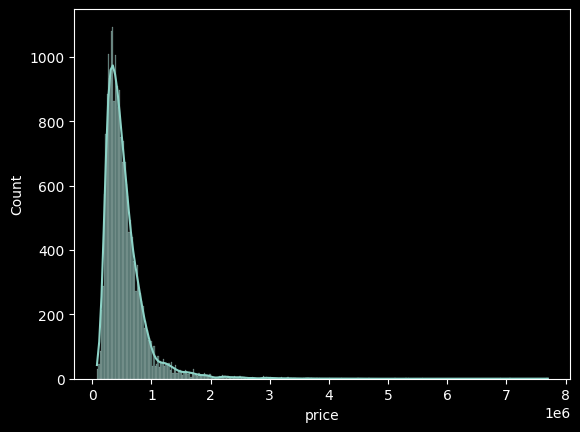

In [6]:
sns.histplot(df['price'], kde=True)

<Axes: xlabel='price', ylabel='sqft_living'>

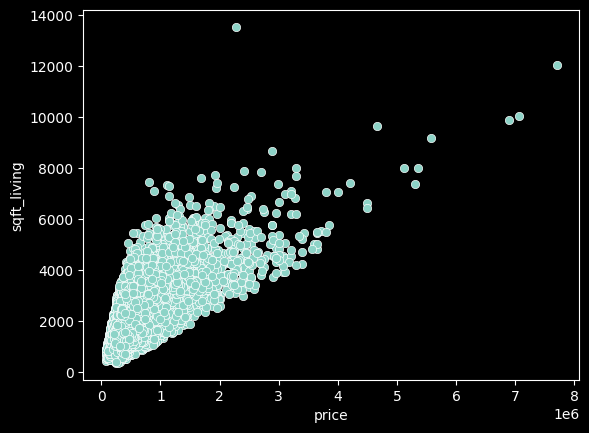

In [9]:
sns.scatterplot(data=df, x='price',y='sqft_living')

<Axes: xlabel='bedrooms', ylabel='price'>

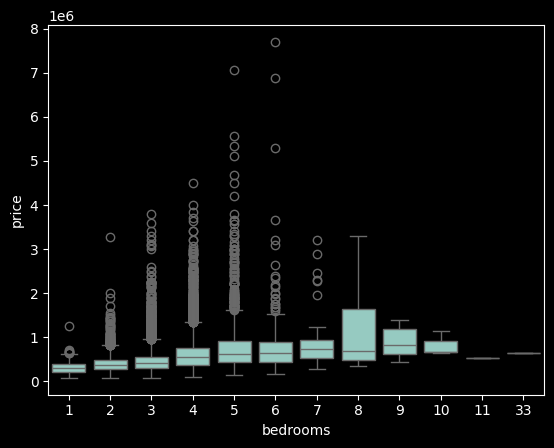

In [12]:
sns.boxplot(data=df, x='bedrooms',y='price')

In [13]:
df.sort_values('price',ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [14]:
len(df)*(0.01)

215.97

In [15]:
df_new = df.sort_values('price',ascending=False).iloc[216:]
df_new.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6329,824059321,6/2/2014,1970000.0,4,3.50,4370,8510,2.0,0,1,...,10,3610,760,2003,0,98004,47.5876,-122.204,2960,10347
12271,1923000260,10/15/2014,1960000.0,5,4.50,6200,23373,3.0,0,1,...,11,5050,1150,1988,0,98040,47.5632,-122.215,3700,14486
9166,3124059023,2/13/2015,1960000.0,3,1.75,3330,12566,1.0,1,4,...,8,1940,1390,1960,0,98040,47.5287,-122.220,3730,16560
12565,2806300065,4/22/2015,1960000.0,4,4.00,4430,31353,2.0,0,0,...,12,4430,0,1998,0,98005,47.6422,-122.157,3900,35237
1150,4055701200,4/21/2015,1960000.0,4,2.75,3120,7898,1.0,1,4,...,8,1560,1560,1963,0,98034,47.7165,-122.259,2630,13868


<Axes: xlabel='long', ylabel='lat'>

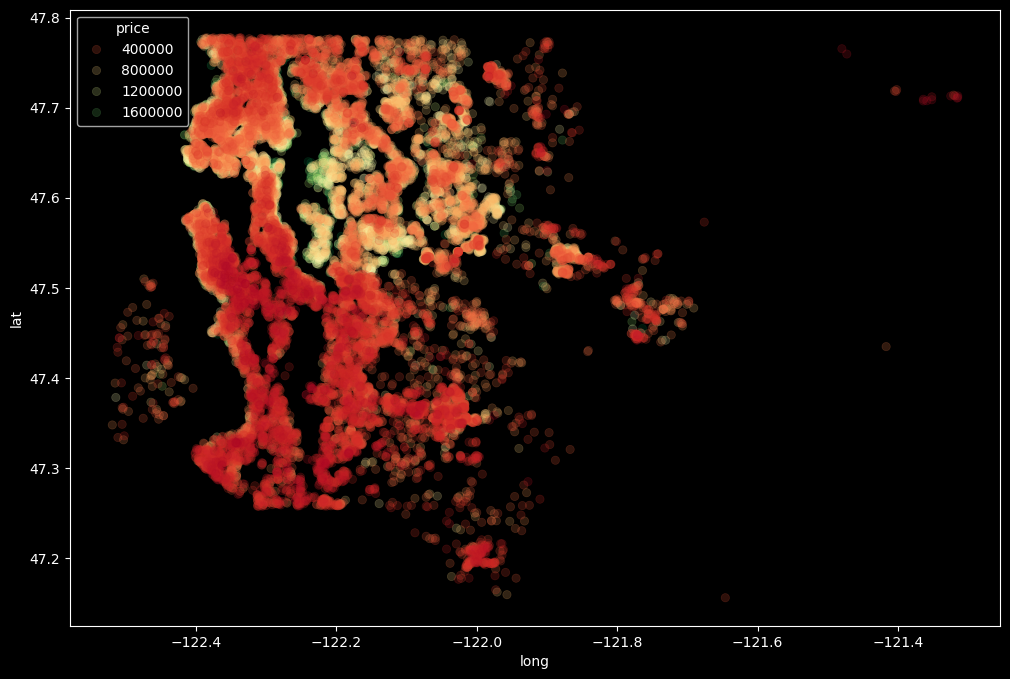

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long', y='lat', data=df_new, hue='price', palette='RdYlGn', edgecolor=None, alpha=0.2)

<Axes: xlabel='waterfront', ylabel='price'>

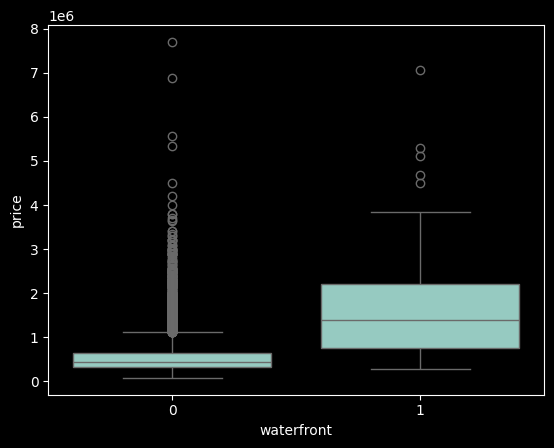

In [19]:
sns.boxplot(x='waterfront',y='price',data=df)

In [20]:
df = df.drop('id',axis=1)

In [22]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

<Axes: xlabel='year', ylabel='price'>

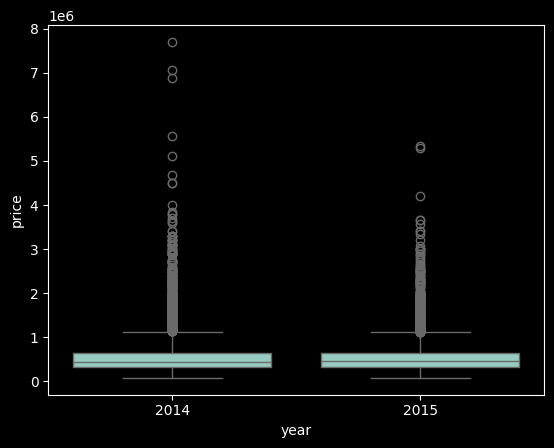

In [23]:
sns.boxplot(x='year',y='price',data=df)

<Axes: xlabel='month', ylabel='price'>

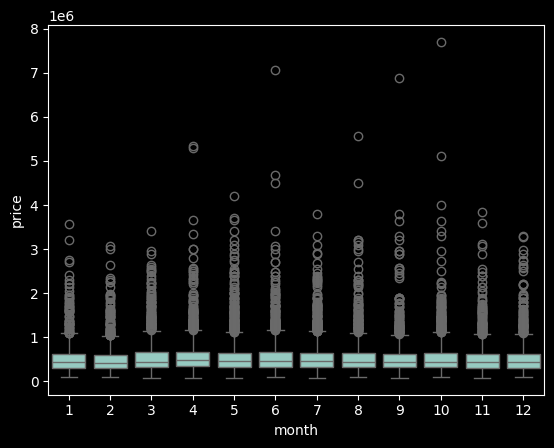

In [24]:
sns.boxplot(x='month',y='price',data=df)

<Axes: xlabel='month'>

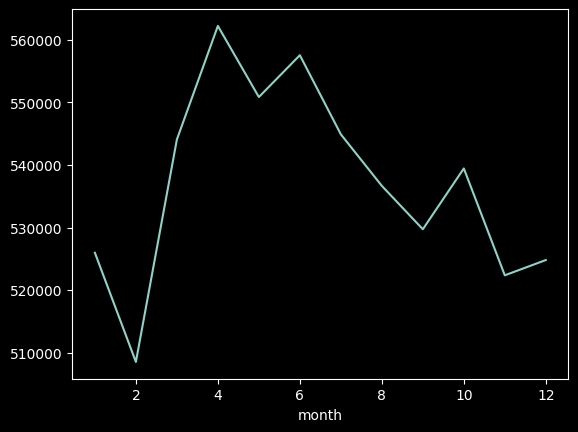

In [25]:
df.groupby('month').mean()['price'].plot()

<Axes: xlabel='year'>

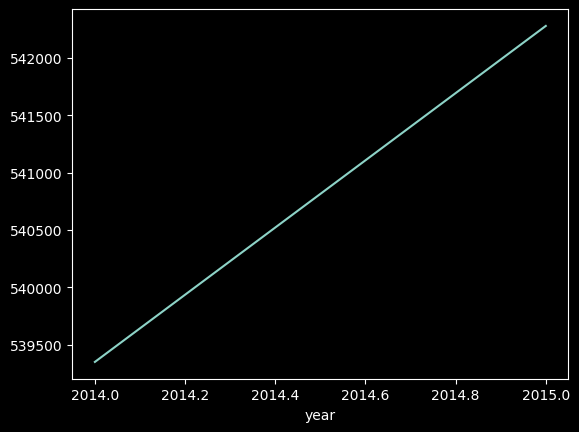

In [42]:
df.groupby('year').mean()['price'].plot()

In [30]:
df = df.drop('date',axis=1)
df = df.drop('zipcode',axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [31]:
X = df.drop('price',axis=1)
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [32]:
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [33]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

2024-05-12 21:40:47.558024: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-12 21:40:47.559849: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [34]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 415167676416.0000 - val_loss: 203973099520.0000
Epoch 2/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 147473629184.0000 - val_loss: 92885811200.0000
Epoch 3/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 85953273856.0000 - val_loss: 87293370368.0000
Epoch 4/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 90492706816.0000 - val_loss: 80603594752.0000
Epoch 5/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 77223608320.0000 - val_loss: 73615564800.0000
Epoch 6/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 73247973376.0000 - val_loss: 66244116480.0000
Epoch 7/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 63793340416.0000 - val_loss: 58943967232.0000
Epoch 8/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60250247168.0000 - val_loss: 53430943744.0000
Epoch 9/100
473/473 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60206370816.0000 - val_loss: 50281066496.0000
Epoch 10/100
473/473 ━━━━━━━━━━━━━

<Axes: >

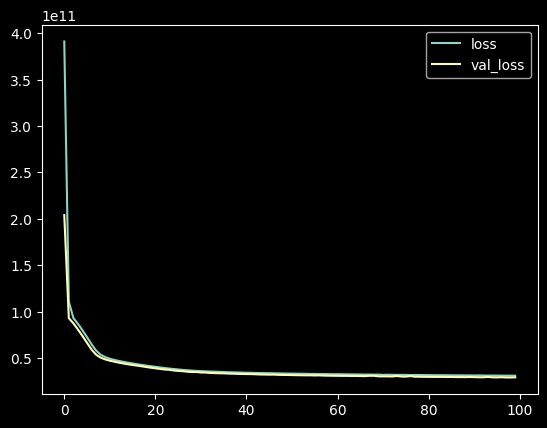

In [35]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [38]:
predictions = model.predict(x_test)
np.sqrt(mean_squared_error(y_test, predictions))

203/203 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


170506.97420566974

In [39]:
explained_variance_score(y_test,predictions)

0.7815162705271868

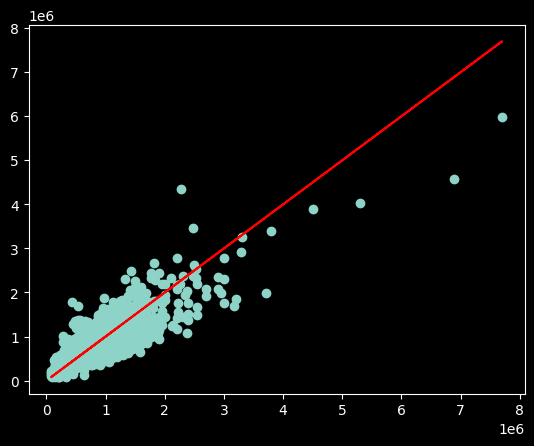

In [40]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [43]:
df_new['date'] = pd.to_datetime(df_new['date'])
df_new['month'] = df_new['date'].apply(lambda date:date.month)
df_new['year'] = df_new['date'].apply(lambda date:date.year)


df_new = df_new.drop(['id', 'date', 'zipcode'],axis=1)

In [44]:
X = df_new.drop('price',axis=1)
Y = df_new['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [45]:
scaler = MinMaxScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
model = Sequential()

model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [47]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=32, epochs=100)

Epoch 1/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 342982361088.0000 - val_loss: 214077652992.0000
Epoch 2/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 117654233088.0000 - val_loss: 54722105344.0000
Epoch 3/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 52662358016.0000 - val_loss: 51286302720.0000
Epoch 4/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 49607483392.0000 - val_loss: 47924842496.0000
Epoch 5/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 46770839552.0000 - val_loss: 44490440704.0000
Epoch 6/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 43338588160.0000 - val_loss: 41018003456.0000
Epoch 7/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 39978594304.0000 - val_loss: 37644845056.0000
Epoch 8/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 35782340608.0000 - val_loss: 34568220672.0000
Epoch 9/100
468/468 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 33213665280.0000 - val_loss: 32137265152.0000
Epoch 10/100
468/468 ━━━━━━━━━━━━━

In [48]:
predictions = model.predict(x_test)
print(f"Mean absolute error: {mean_absolute_error(y_test, predictions)}")
print(f"Explained variance score: {explained_variance_score(y_test,predictions)}")

201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step
Mean absolute error: 98473.99421643608
Explained variance score: 0.7355462088263454


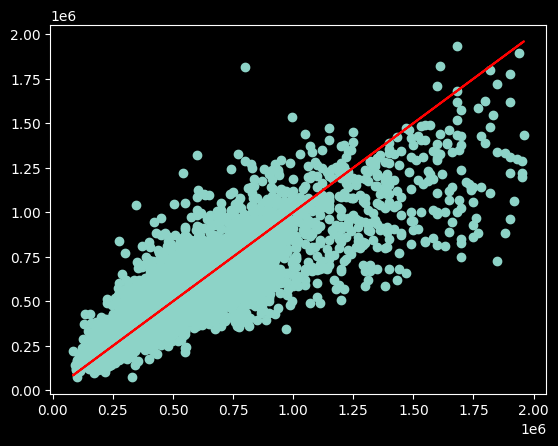

In [49]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [51]:
single_house = df.drop('price',axis=1).iloc[0]
single_house = scaler.transform(single_house.values.reshape(-1, 19))

/home/shaaswat/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [52]:
model.predict(single_house)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[281183.78]], dtype=float32)

In [53]:
df.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
month                10.0000
year               2014.0000
Name: 0, dtype: float64